In [2]:
from google.colab import files
import pandas as pd

# Upload the file manually
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    df = pd.read_csv(filename)  # Change to read_excel(filename) if using an Excel file

# Display the first few rows
df.head()


Saving emotional_features.csv to emotional_features.csv
Saving profile_features.csv to profile_features.csv
Saving textual_features.csv to textual_features.csv
Uploaded file: emotional_features.csv
Uploaded file: profile_features.csv
Uploaded file: textual_features.csv


,user_id,tri_grams
0,346,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1217,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,590,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1243,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,543,"[0.0, 0.0, 0.05178241123988141, 0.0, 0.0, 0.0,..."


In [3]:
from google.colab import files
import pandas as pd

# Upload the file manually
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    df = pd.read_csv(filename)  # Change to read_excel(filename) if using an Excel file

# Display the first few rows
df.head()


Saving statistical_features.csv to statistical_features.csv
Uploaded file: statistical_features.csv


,user_id,non_duplicate,hashtags_prop,hashtags_per_twt_prop,mentions_prop,n_unique_mentions,replies_prop,urls_prop,qt_prop,media_prop,count_RT,avg_engagement,avg_days_between_tweets
0,346,0.000825,0.000203,0.002732,0.000444,0.015670,0.000178,0.000178,0.000038,0.000393,0.015670,0.999742,0.004019
1,1217,0.000378,0.000219,0.000841,0.000348,0.223976,0.000048,0.000022,0.000012,0.000055,0.974125,0.030225,0.000382
2,590,0.000467,0.000194,0.000867,0.000316,0.257784,0.000018,0.000014,0.000005,0.000126,0.960611,0.103773,0.001737
3,1243,0.001321,0.000438,0.002554,0.000582,0.377156,0.000294,0.000078,0.000063,0.000246,0.815616,0.438758,0.002665
4,543,0.001613,0.000206,0.001985,0.001214,0.951983,0.001131,0.000017,0.000017,0.000146,0.305937,0.010891,0.001644


In [4]:
from google.colab import files
import pandas as pd

# Upload the file manually
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    df = pd.read_csv(filename)  # Change to read_excel(filename) if using an Excel file

# Display the first few rows
df.head()


Saving Users.csv to Users.csv
Uploaded file: Users.csv


,user_id,N_False,N_True
0,344,0,1
1,1198,2,0
2,584,0,1
3,1222,0,1
4,537,2,0


In [5]:
import pandas as pd

# List of dataset filenames (Update these based on your uploaded files)
filenames = ["Users.csv", "profile_features.csv", "statistical_features.csv", "textual_features.csv", "emotional_features.csv"]

# Check each dataset
for file in filenames:
    try:
        df = pd.read_csv(file)
        print(f"🔹 Dataset: {file}")
        print(df.head())  # Show first few rows
        print("\nColumns:\n", df.columns)  # Show column names
        print("\nMissing Values:\n", df.isnull().sum())  # Check missing values
        print("\n-----------------------------\n")
    except Exception as e:
        print(f"Error loading {file}: {e}")


🔹 Dataset: Users.csv
   user_id  N_False  N_True
0      344        0       1
1     1198        2       0
2      584        0       1
3     1222        0       1
4      537        2       0

Columns:
 Index(['user_id', 'N_False', 'N_True'], dtype='object')

Missing Values:
 user_id    0
N_False    0
N_True     0
dtype: int64

-----------------------------

🔹 Dataset: profile_features.csv
   user_id  statuses_count  followers_count  following_count  \
0      346        0.110131         0.269398         0.755670   
1     1217        0.963784         0.102310         0.001567   
2      590        0.433809         0.661664         0.601345   
3     1243        0.965000         0.166515         0.150806   
4      543        0.566996         0.073917         0.010032   

   favourites_count  listed_count  default_profile  verified  tweet_freq  \
0          0.374446      0.000000         0.001694       0.0    0.055066   
1          0.225275      0.000114         0.000000       0.0    0.096378 

In [6]:
import pandas as pd

# Load datasets
users = pd.read_csv("Users.csv")
statistical = pd.read_csv("statistical_features.csv")
textual = pd.read_csv("textual_features.csv")
emotional = pd.read_csv("emotional_features.csv")

# Merge all required datasets on 'user_id'
df = users.merge(statistical, on="user_id").merge(textual, on="user_id").merge(emotional, on="user_id")

# Remove 'user_id' (as it’s just an identifier)
df.drop(columns=['user_id'], inplace=True)

# Convert N_False and N_True into a single binary label
df['label'] = df['N_True'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['N_False', 'N_True'], inplace=True)

# Display the final dataset structure
print("🔹 Final Dataset Structure:\n", df.head())
print("\n🔹 Missing Values:\n", df.isnull().sum())


🔹 Final Dataset Structure:
    non_duplicate  hashtags_prop  hashtags_per_twt_prop  mentions_prop  \
0       0.000248       0.000192               0.000490       0.000162   
1       0.001467       0.001383               0.003002       0.000645   
2       0.012304       0.001656               0.019749       0.011831   
3       0.000619       0.000264               0.001104       0.000368   
4       0.010332       0.009359               0.024799       0.000624   

   n_unique_mentions  replies_prop  urls_prop   qt_prop  media_prop  count_RT  \
0           0.003262      0.000000   0.000003  0.000006    0.000086  0.014054   
1           0.339085      0.000002   0.000416  0.000000    0.000820  0.935052   
2           0.989539      0.011358   0.009701  0.008637    0.000946  0.043656   
3           0.477505      0.000089   0.000058  0.000056    0.000101  0.873257   
4           0.993112      0.000000   0.000068  0.000000    0.010274  0.093104   

   ...   disgust      fear       joy      love

In [7]:
import pandas as pd

# Load datasets
users = pd.read_csv("Users.csv")
statistical = pd.read_csv("statistical_features.csv")  # Keep all columns
textual = pd.read_csv("textual_features.csv")  # Keep only 'user_id' & 'tri_grams'
emotional = pd.read_csv("emotional_features.csv")  # Keep all columns

# 🔹 Remove Profile Features (Not Needed)
# Do NOT load 'profile_features.csv' since we are removing profile-related data

# Merge datasets (on 'user_id')
df = users.merge(statistical, on="user_id").merge(textual, on="user_id").merge(emotional, on="user_id")

# Drop 'user_id' (only used for merging)
df.drop(columns=['user_id'], inplace=True)

# 🔹 Convert N_False and N_True into a single binary label
df['label'] = df['N_True'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['N_False', 'N_True'], inplace=True)

# ✅ Check Final Structure
print("✅ Data Merged Successfully! Shape:", df.shape)
print("🔹 Columns in Final DataFrame:\n", df.columns)


✅ Data Merged Successfully! Shape: (1516, 25)
🔹 Columns in Final DataFrame:
 Index(['non_duplicate', 'hashtags_prop', 'hashtags_per_twt_prop',
       'mentions_prop', 'n_unique_mentions', 'replies_prop', 'urls_prop',
       'qt_prop', 'media_prop', 'count_RT', 'avg_engagement',
       'avg_days_between_tweets', 'tri_grams', 'anger', 'anticipation',
       'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness',
       'surprise', 'trust', 'label'],
      dtype='object')


✅ Summary Statistics:
        non_duplicate  hashtags_prop  hashtags_per_twt_prop  mentions_prop  \
count    1516.000000    1516.000000            1516.000000    1516.000000   
mean        0.018099       0.007039               0.029035       0.001474   
std         0.066258       0.033246               0.103528       0.013479   
min         0.000143       0.000000               0.000000       0.000000   
25%         0.000680       0.000104               0.001092       0.000342   
50%         0.001301       0.000261               0.002110       0.000475   
75%         0.004159       0.001384               0.007271       0.000791   
max         0.625498       0.408248               0.920794       0.408248   

       n_unique_mentions  replies_prop    urls_prop      qt_prop   media_prop  \
count        1516.000000   1516.000000  1516.000000  1516.000000  1516.000000   
mean            0.559722      0.000944     0.012417     0.000119     0.007523   
std             0.319681      0.010660  

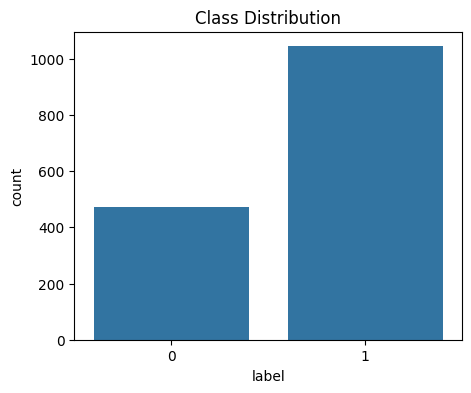

🔹 Label Counts:
 label
1    1044
0     472
Name: count, dtype: int64


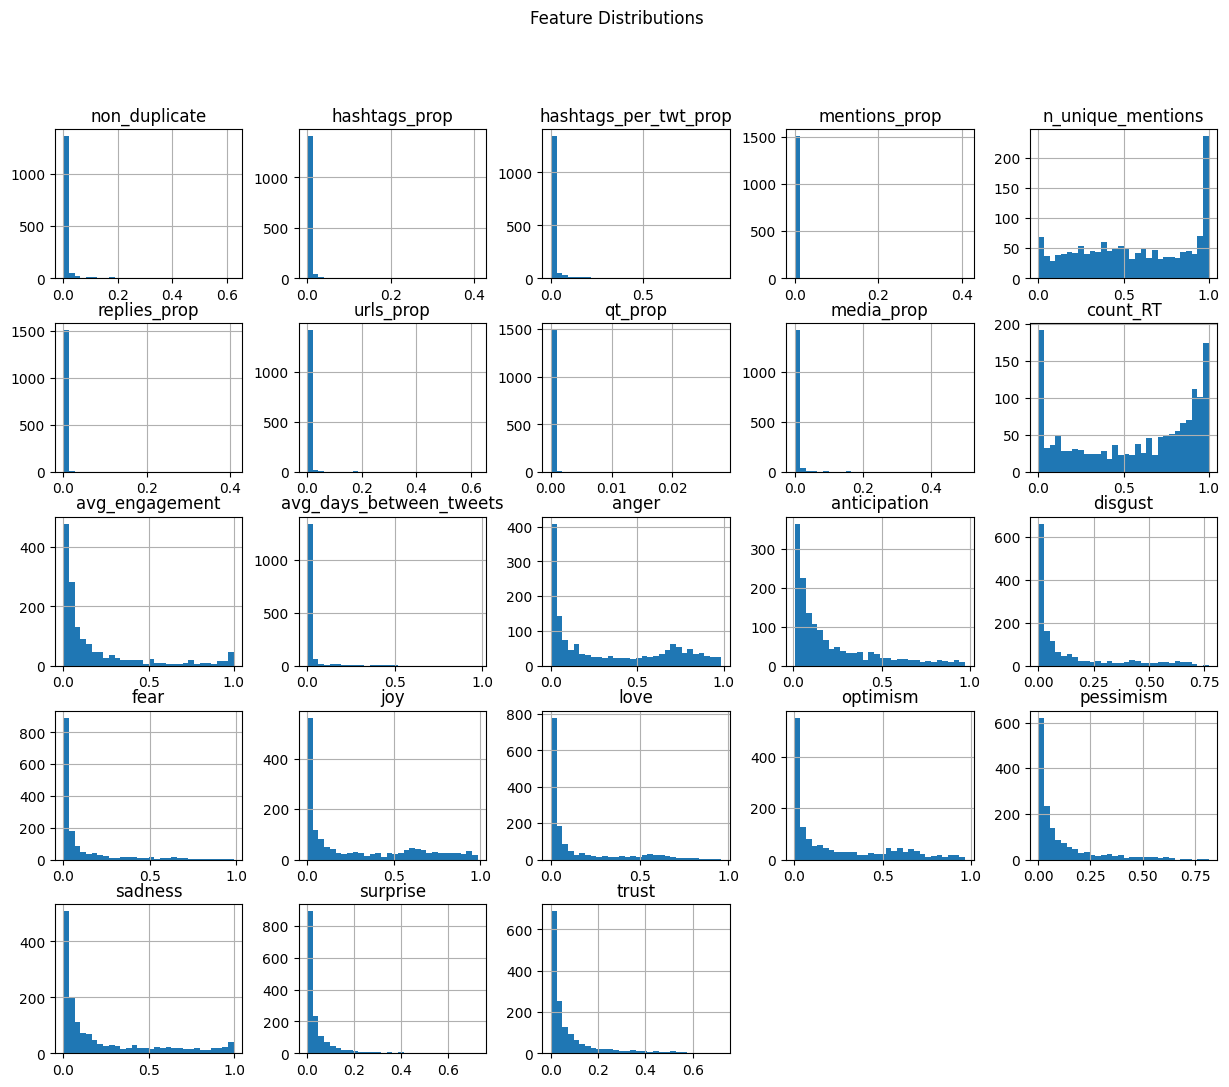

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Check summary statistics
print("✅ Summary Statistics:\n", df.describe())

# 🔹 Plot class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=df['label'])
plt.title("Class Distribution")
plt.show()

# 🔹 Print class counts
print("🔹 Label Counts:\n", df['label'].value_counts())

# 🔹 Histogram of numerical features
df.drop(columns=['label']).hist(figsize=(15, 12), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


In [9]:
import ast
import numpy as np

# Convert `tri_grams` from string representation to actual lists
df['tri_grams'] = df['tri_grams'].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))

# Standardize the length of `tri_grams`
MAX_FEATURES = 300  # Choose a fixed number of features for PCA
df['tri_grams'] = df['tri_grams'].apply(lambda x: np.pad(x[:MAX_FEATURES], (0, max(0, MAX_FEATURES - len(x))), mode='constant'))


In [10]:
# Convert `tri_grams` array into separate columns
tri_grams_df = pd.DataFrame(df['tri_grams'].tolist(), columns=[f'tri_gram_{i}' for i in range(MAX_FEATURES)])

# Remove old `tri_grams` column and merge with the main dataset
df = df.drop(columns=['tri_grams']).reset_index(drop=True)
df = pd.concat([df, tri_grams_df], axis=1)

print("✅ `tri_grams` processed successfully! New shape:", df.shape)


✅ `tri_grams` processed successfully! New shape: (1516, 324)


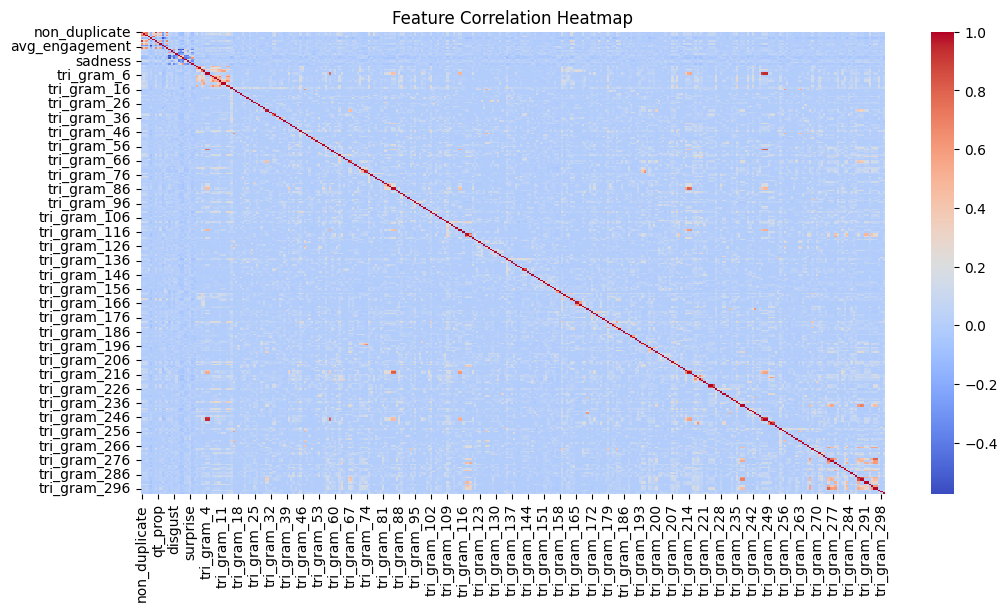

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
profile_features = [
    'statuses_count', 'followers_count', 'following_count', 'favourites_count',
    'listed_count', 'default_profile', 'verified', 'tweet_freq',
    'follower_growth_rate', 'following_growth_rate', 'listed_growth_rate',
    'followers_following_ratio', 'screen_name_length', 'digits_in_screen_name',
    'name_length', 'digits_in_name', 'description_length'
]

# Drop these columns
df = df.drop(columns=profile_features, errors='ignore')

print("✅ Profile-related features removed!")
print("🔹 Remaining columns:", df.columns)


✅ Profile-related features removed!
🔹 Remaining columns: Index(['non_duplicate', 'hashtags_prop', 'hashtags_per_twt_prop',
       'mentions_prop', 'n_unique_mentions', 'replies_prop', 'urls_prop',
       'qt_prop', 'media_prop', 'count_RT',
       ...
       'tri_gram_290', 'tri_gram_291', 'tri_gram_292', 'tri_gram_293',
       'tri_gram_294', 'tri_gram_295', 'tri_gram_296', 'tri_gram_297',
       'tri_gram_298', 'tri_gram_299'],
      dtype='object', length=324)


In [13]:
print("Available Columns in df:\n", df.columns)


Available Columns in df:
 Index(['non_duplicate', 'hashtags_prop', 'hashtags_per_twt_prop',
       'mentions_prop', 'n_unique_mentions', 'replies_prop', 'urls_prop',
       'qt_prop', 'media_prop', 'count_RT',
       ...
       'tri_gram_290', 'tri_gram_291', 'tri_gram_292', 'tri_gram_293',
       'tri_gram_294', 'tri_gram_295', 'tri_gram_296', 'tri_gram_297',
       'tri_gram_298', 'tri_gram_299'],
      dtype='object', length=324)


In [14]:
print(df.head())  # Check first few rows


   non_duplicate  hashtags_prop  hashtags_per_twt_prop  mentions_prop  \
0       0.000248       0.000192               0.000490       0.000162   
1       0.001467       0.001383               0.003002       0.000645   
2       0.012304       0.001656               0.019749       0.011831   
3       0.000619       0.000264               0.001104       0.000368   
4       0.010332       0.009359               0.024799       0.000624   

   n_unique_mentions  replies_prop  urls_prop   qt_prop  media_prop  count_RT  \
0           0.003262      0.000000   0.000003  0.000006    0.000086  0.014054   
1           0.339085      0.000002   0.000416  0.000000    0.000820  0.935052   
2           0.989539      0.011358   0.009701  0.008637    0.000946  0.043656   
3           0.477505      0.000089   0.000058  0.000056    0.000101  0.873257   
4           0.993112      0.000000   0.000068  0.000000    0.010274  0.093104   

   ...  tri_gram_290  tri_gram_291  tri_gram_292  tri_gram_293  tri_gram_2

In [16]:
print("Columns in df:", df.columns)
print("Columns in df_textual:", df_textual.columns)


Columns in df: Index(['non_duplicate', 'hashtags_prop', 'hashtags_per_twt_prop',
       'mentions_prop', 'n_unique_mentions', 'replies_prop', 'urls_prop',
       'qt_prop', 'media_prop', 'count_RT',
       ...
       'tri_gram_290', 'tri_gram_291', 'tri_gram_292', 'tri_gram_293',
       'tri_gram_294', 'tri_gram_295', 'tri_gram_296', 'tri_gram_297',
       'tri_gram_298', 'tri_gram_299'],
      dtype='object', length=324)
Columns in df_textual: Index(['user_id', 'tri_grams'], dtype='object')


In [17]:
df_users = pd.read_csv("Users.csv")  # Load original user dataset

# Merge `user_id` back into df
df = df_users[['user_id']].merge(df, left_index=True, right_index=True)

print("✅ `user_id` restored! Columns in df now:", df.columns)


✅ `user_id` restored! Columns in df now: Index(['user_id', 'non_duplicate', 'hashtags_prop', 'hashtags_per_twt_prop',
       'mentions_prop', 'n_unique_mentions', 'replies_prop', 'urls_prop',
       'qt_prop', 'media_prop',
       ...
       'tri_gram_290', 'tri_gram_291', 'tri_gram_292', 'tri_gram_293',
       'tri_gram_294', 'tri_gram_295', 'tri_gram_296', 'tri_gram_297',
       'tri_gram_298', 'tri_gram_299'],
      dtype='object', length=325)


In [18]:
df = df.merge(df_textual[['user_id', 'tri_grams']], on="user_id", how="left")
print("✅ `tri_grams` column merged successfully!")


✅ `tri_grams` column merged successfully!


In [19]:
print("Missing Values in `tri_grams`:\n", df['tri_grams'].isnull().sum())


Missing Values in `tri_grams`:
 29


In [20]:
# Import necessary library
import numpy as np

# Define a function to replace missing `tri_grams` values with zeros
def fix_missing_tri_grams(x):
    if isinstance(x, str):  # Convert from string if needed
        return np.array(ast.literal_eval(x))
    elif isinstance(x, np.ndarray):  # If already a NumPy array, keep it
        return x
    else:  # If missing, replace with zeros of appropriate length
        return np.zeros(42939)  # Adjust size based on dataset

# Apply the function
df['tri_grams'] = df['tri_grams'].apply(fix_missing_tri_grams)

# Check again if there are missing values
print("✅ Missing values fixed! Remaining missing:", df['tri_grams'].isnull().sum())


✅ First `tri_grams` entry shape: (42939,)


In [25]:
import numpy as np
import ast

# Convert `tri_grams` safely to lists
def safe_convert(x):
    """Convert string lists to actual lists and handle NaN values."""
    try:
        if isinstance(x, str):
            return np.array(ast.literal_eval(x))
        elif isinstance(x, (list, np.ndarray)):
            return np.array(x)
        else:
            return np.array([])  # Default to empty array
    except (ValueError, SyntaxError, TypeError):
        return np.array([])  # Handle errors safely

df['tri_grams'] = df['tri_grams'].apply(safe_convert)

# Handle missing values: Replace empty lists with zero-padded arrays
fixed_size = 1000  # Adjust as needed

def fix_length(arr, size=fixed_size):
    """Ensure all arrays have the same length by padding or truncating."""
    arr = np.array(arr, dtype=float)  # Convert to NumPy array
    if arr.size == 0:
        return np.zeros(size)  # If empty, return zero vector
    elif len(arr) > size:
        return arr[:size]  # Truncate if too long
    else:
        return np.pad(arr, (0, size - len(arr)))  # Pad with zeros

df['tri_grams_fixed'] = df['tri_grams'].apply(fix_length)

# Convert `tri_grams_fixed` into a NumPy array
tri_grams_array = np.vstack(df['tri_grams_fixed'].values)

print(f"✅ All `tri_grams` vectors are now of size {fixed_size}!")

# Apply PCA to reduce to 300 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=300, random_state=42)
tri_grams_reduced = pca.fit_transform(tri_grams_array)

# Convert PCA results back to DataFrame
tri_grams_df = pd.DataFrame(tri_grams_reduced, columns=[f"tri_gram_{i}" for i in range(300)])

# Drop old `tri_grams` columns & merge PCA results
df = df.drop(columns=['tri_grams', 'tri_grams_fixed']).reset_index(drop=True)
df = pd.concat([df, tri_grams_df], axis=1)

print(f"✅ PCA Applied! Reduced `tri_grams` to {tri_grams_df.shape[1]} dimensions.")


✅ All `tri_grams` vectors are now of size 1000!
✅ PCA Applied! Reduced `tri_grams` to 300 dimensions.


In [26]:
# Check final dataset shape
print("✅ Final Data Shape:", df.shape)

# Check if there are any missing values
print("🔹 Missing Values:\n", df.isnull().sum())

# Display first few rows
df.head()


✅ Final Data Shape: (1516, 625)
🔹 Missing Values:
 user_id                  0
non_duplicate            0
hashtags_prop            0
hashtags_per_twt_prop    0
mentions_prop            0
                        ..
tri_gram_295             0
tri_gram_296             0
tri_gram_297             0
tri_gram_298             0
tri_gram_299             0
Length: 625, dtype: int64


,user_id,non_duplicate,hashtags_prop,hashtags_per_twt_prop,mentions_prop,n_unique_mentions,replies_prop,urls_prop,qt_prop,media_prop,...,tri_gram_290,tri_gram_291,tri_gram_292,tri_gram_293,tri_gram_294,tri_gram_295,tri_gram_296,tri_gram_297,tri_gram_298,tri_gram_299
0,344,0.000248,0.000192,0.000490,0.000162,0.003262,0.000000,0.000003,0.000006,0.000086,...,-0.001718,0.001701,0.001045,0.003558,-0.000029,0.001184,-0.000806,0.000871,0.000634,-0.001428
1,1198,0.001467,0.001383,0.003002,0.000645,0.339085,0.000002,0.000416,0.000000,0.000820,...,0.008683,0.007199,0.010386,0.001064,-0.003185,0.006996,-0.004828,-0.003645,0.011318,0.004329
2,584,0.012304,0.001656,0.019749,0.011831,0.989539,0.011358,0.009701,0.008637,0.000946,...,-0.009827,0.000430,-0.000284,0.002073,0.006738,-0.011363,0.000039,-0.002704,0.001141,-0.000540
3,1222,0.000619,0.000264,0.001104,0.000368,0.477505,0.000089,0.000058,0.000056,0.000101,...,0.004044,0.001069,-0.001548,0.007151,0.009714,-0.005634,0.005224,-0.001144,-0.000121,-0.003313
4,537,0.010332,0.009359,0.024799,0.000624,0.993112,0.000000,0.000068,0.000000,0.010274,...,-0.004382,0.001368,-0.001298,-0.002627,-0.002100,-0.002811,-0.001474,-0.003231,0.000862,-0.002956


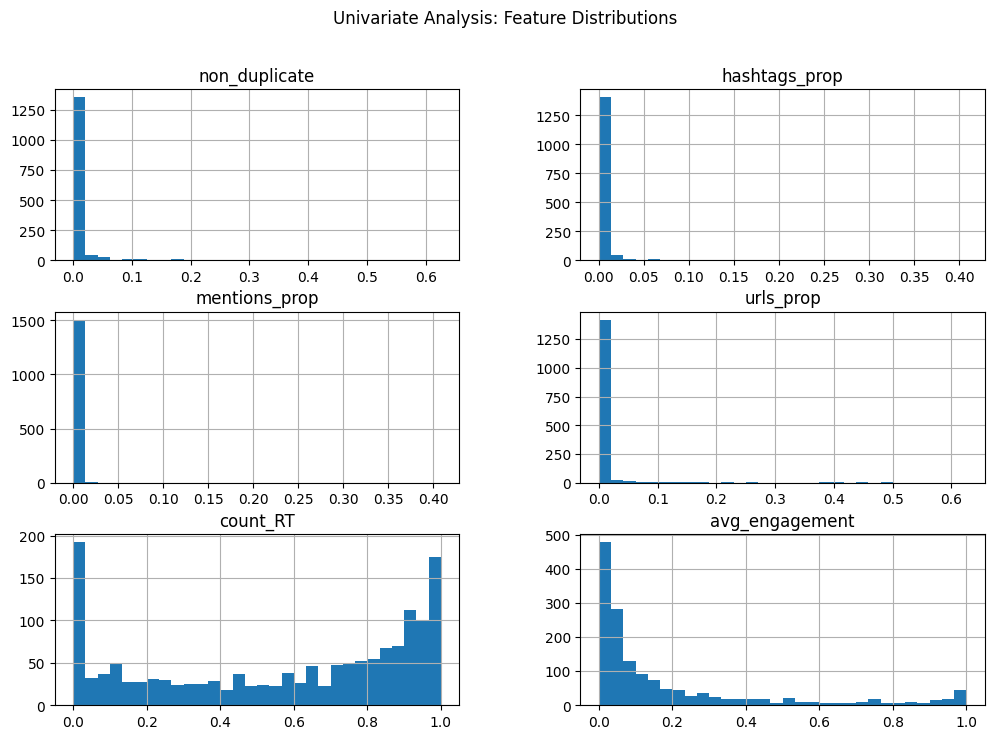

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select some important numerical features
selected_features = ['non_duplicate', 'hashtags_prop', 'mentions_prop', 'urls_prop', 'count_RT', 'avg_engagement']

# Plot histograms
df[selected_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Univariate Analysis: Feature Distributions")
plt.show()


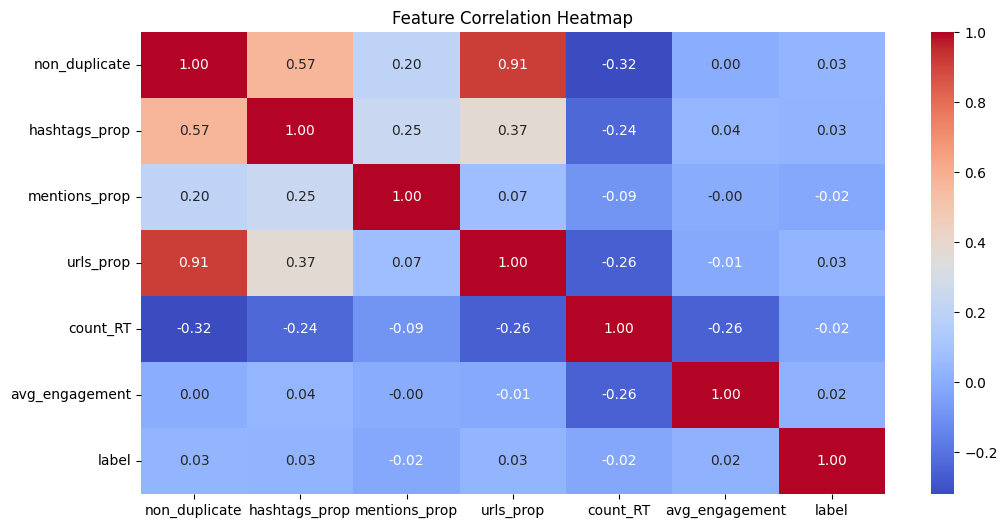

In [28]:
# 🔹 Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[selected_features + ['label']].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


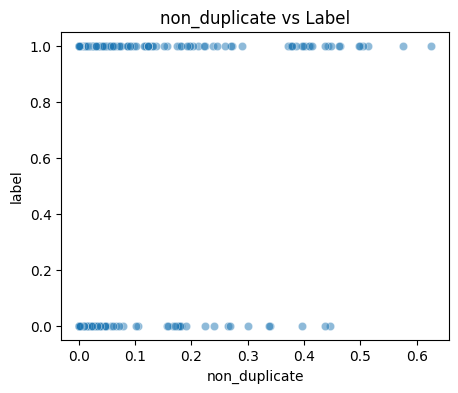

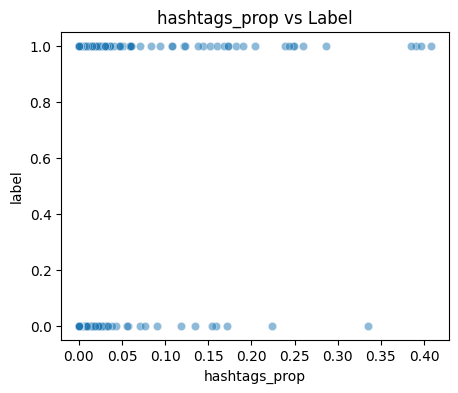

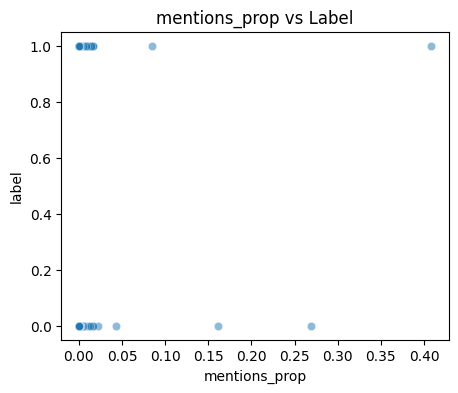

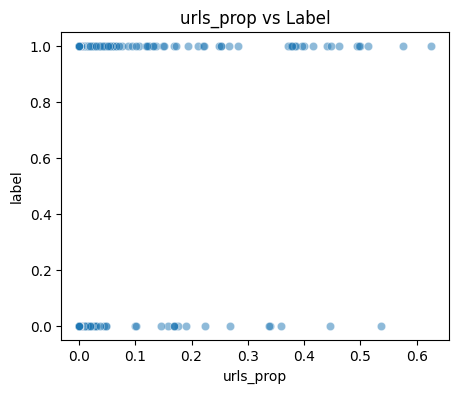

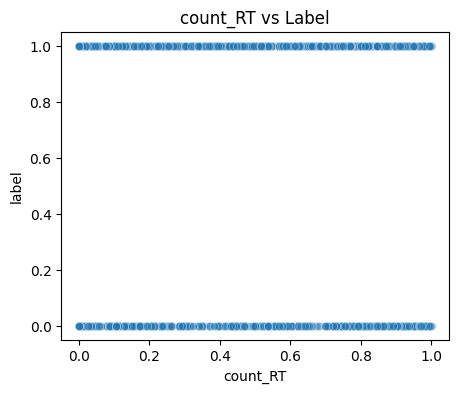

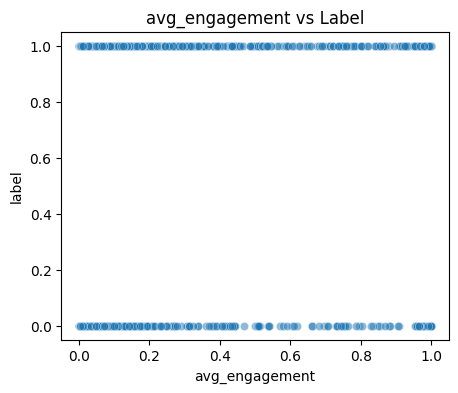

In [29]:
# Scatter plots for key features
for feature in selected_features:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=df[feature], y=df['label'], alpha=0.5)
    plt.title(f"{feature} vs Label")
    plt.show()


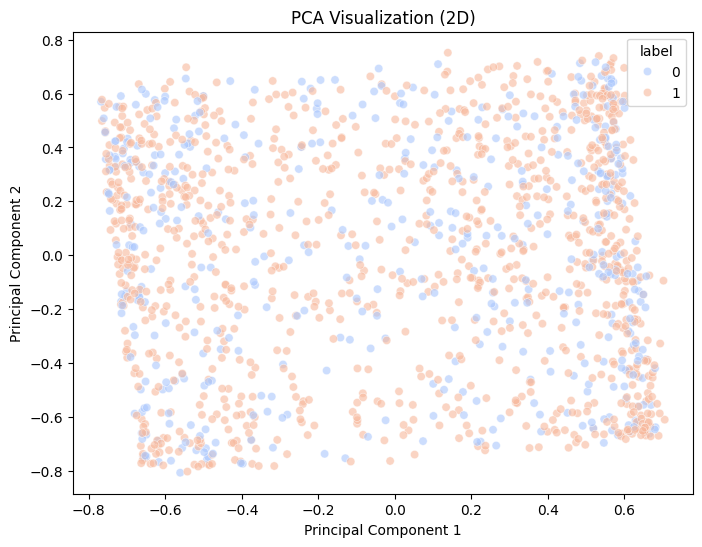

In [30]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df.drop(columns=['user_id', 'label']))

# Plot PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['label'], palette="coolwarm", alpha=0.6)
plt.title("PCA Visualization (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


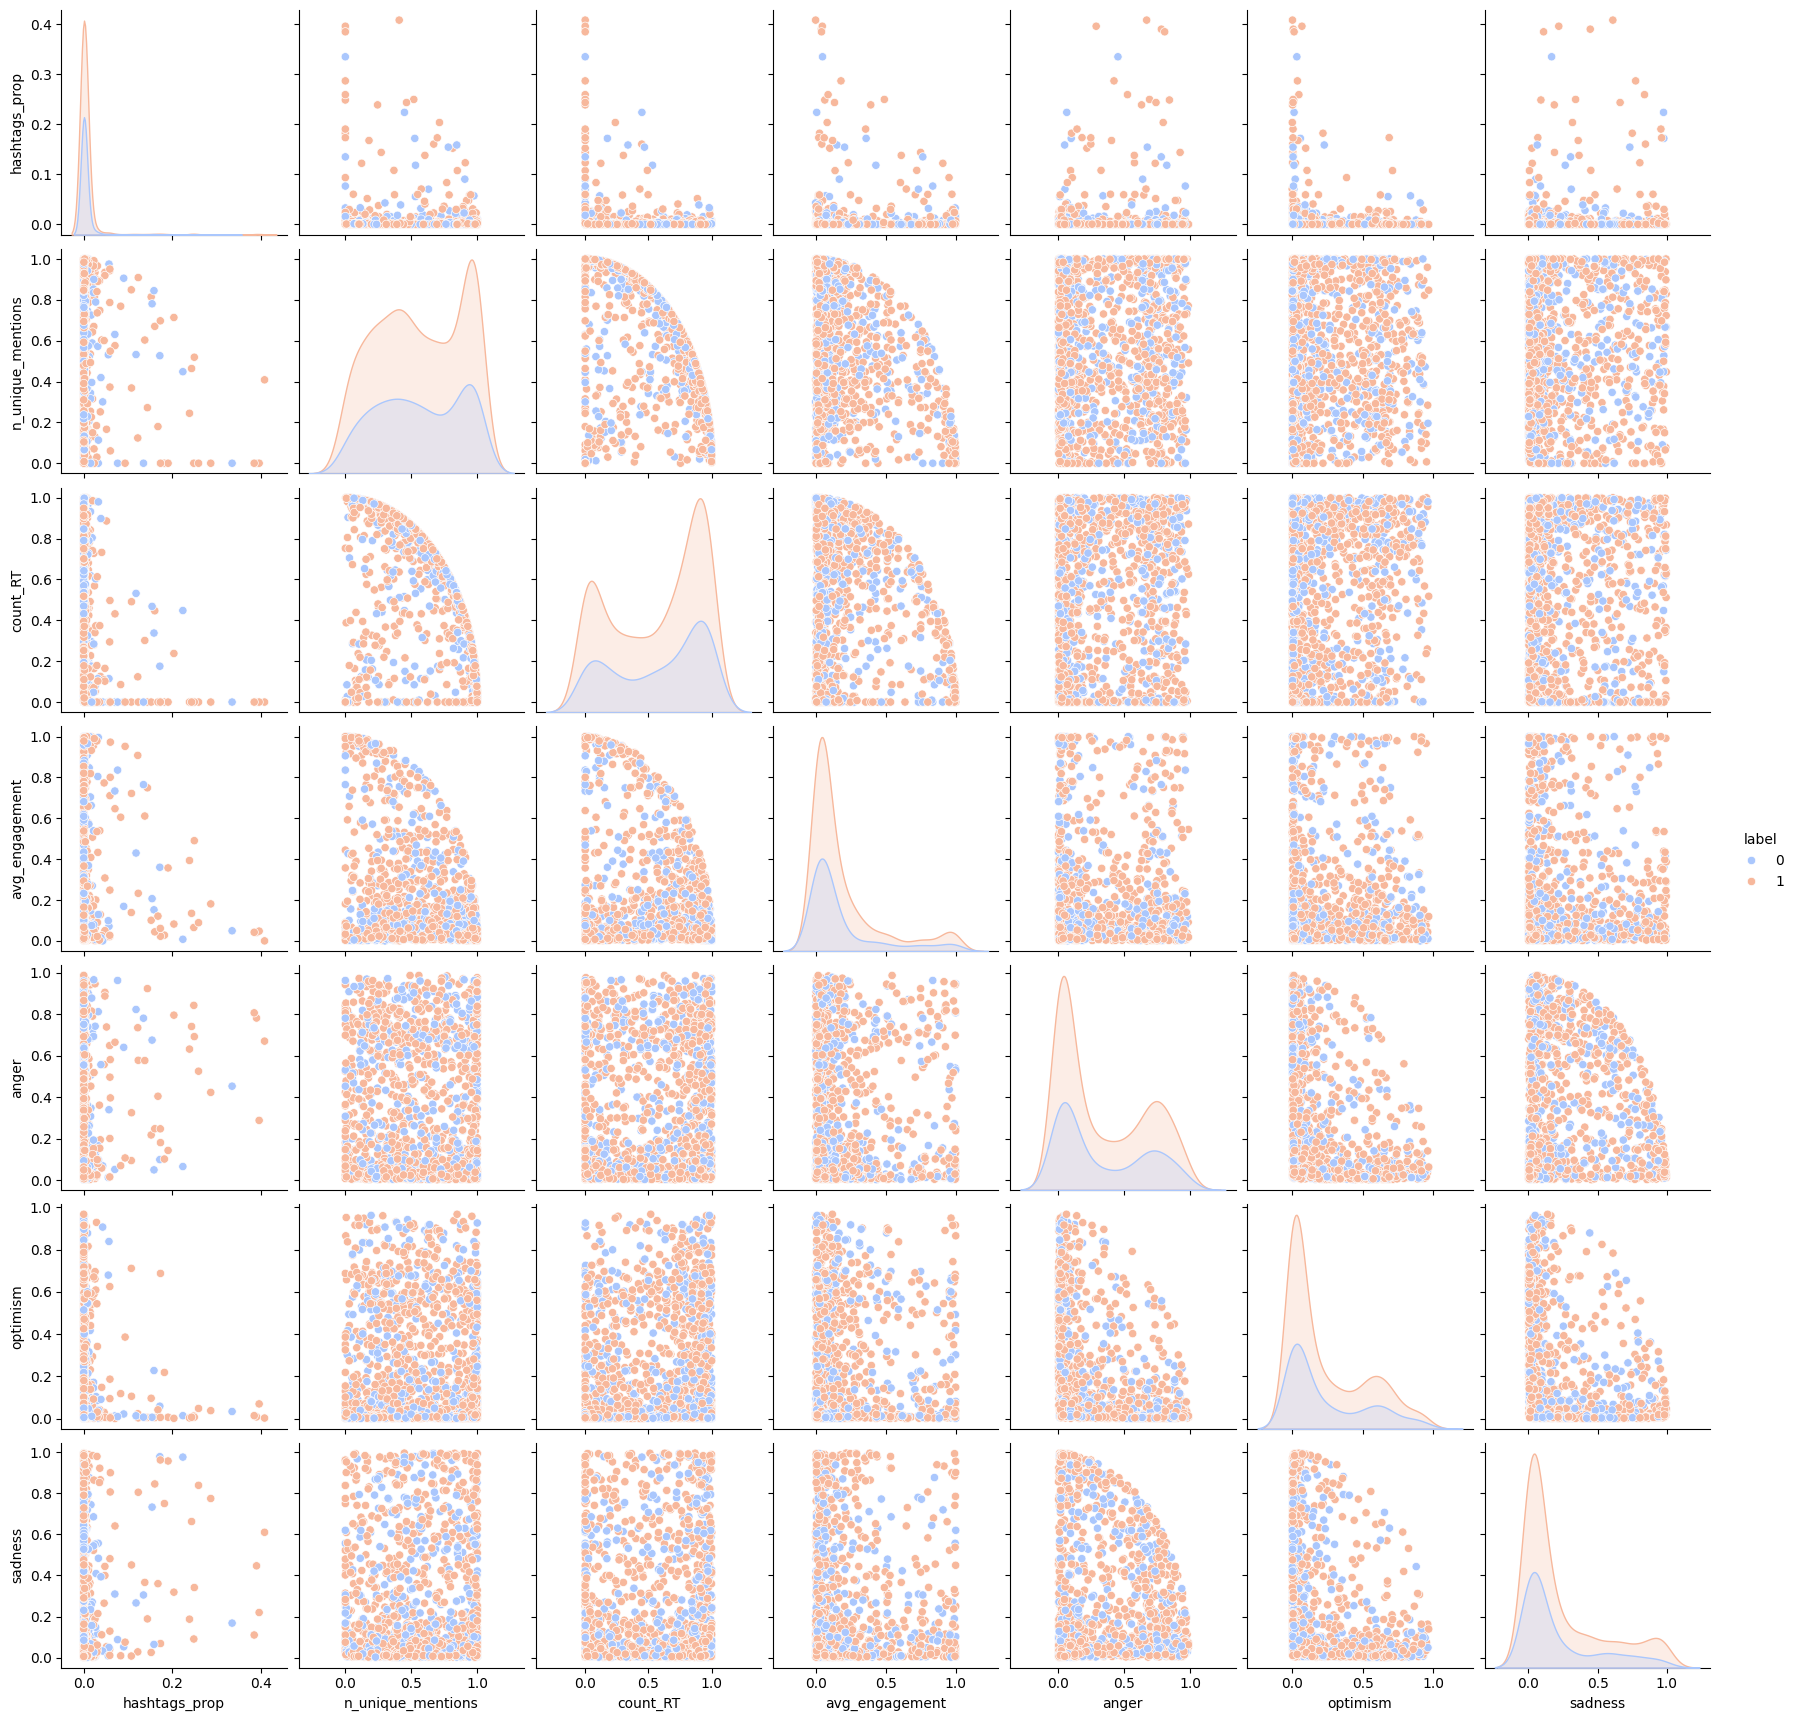

In [31]:
import seaborn as sns

# Select key features for pairplot
selected_features = ['hashtags_prop', 'n_unique_mentions', 'count_RT', 'avg_engagement', 'anger', 'optimism', 'sadness']

# Create pairplot
sns.pairplot(df[selected_features + ['label']], hue="label", palette="coolwarm")
plt.show()


In [33]:
print("🔹 Available Columns in df:\n", df.columns)


🔹 Available Columns in df:
 Index(['user_id', 'non_duplicate', 'hashtags_prop', 'hashtags_per_twt_prop',
       'mentions_prop', 'n_unique_mentions', 'replies_prop', 'urls_prop',
       'qt_prop', 'media_prop',
       ...
       'tri_gram_290', 'tri_gram_291', 'tri_gram_292', 'tri_gram_293',
       'tri_gram_294', 'tri_gram_295', 'tri_gram_296', 'tri_gram_297',
       'tri_gram_298', 'tri_gram_299'],
      dtype='object', length=625)


In [34]:
# Reload the original textual dataset
df_textual = pd.read_csv("textual_features.csv")

# Merge back the 'tri_grams' column
df = df.merge(df_textual[['user_id', 'tri_grams']], on="user_id", how="left")

print("✅ `tri_grams` column restored!")
print("Available Columns:\n", df.columns)


✅ `tri_grams` column restored!
Available Columns:
 Index(['user_id', 'non_duplicate', 'hashtags_prop', 'hashtags_per_twt_prop',
       'mentions_prop', 'n_unique_mentions', 'replies_prop', 'urls_prop',
       'qt_prop', 'media_prop',
       ...
       'tri_gram_291', 'tri_gram_292', 'tri_gram_293', 'tri_gram_294',
       'tri_gram_295', 'tri_gram_296', 'tri_gram_297', 'tri_gram_298',
       'tri_gram_299', 'tri_grams'],
      dtype='object', length=626)


In [36]:
import nltk

# Manually install only 'punkt' again
nltk.data.find('tokenizers/punkt')
print("✅ 'punkt' is already installed!")


✅ 'punkt' is already installed!


In [37]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

print("✅ Stopwords Loaded Successfully!")


✅ Stopwords Loaded Successfully!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
import os
os.environ['NLTK_DATA'] = '/root/nltk_data'

print("✅ Set NLTK data path manually!")


✅ Set NLTK data path manually!


In [39]:
import os

print("🔹 punkt Exists:", os.path.exists('/root/nltk_data/tokenizers/punkt'))
print("🔹 stopwords Exists:", os.path.exists('/root/nltk_data/corpora/stopwords'))


🔹 punkt Exists: True
🔹 stopwords Exists: True


In [40]:
import importlib
import nltk

importlib.reload(nltk)
print("✅ NLTK Reloaded Successfully!")


✅ NLTK Reloaded Successfully!


In [42]:
import nltk
import shutil
import os

# Delete corrupted or outdated tokenizers
shutil.rmtree('/root/nltk_data/tokenizers', ignore_errors=True)

# Manually set NLTK data path
nltk.data.path.append('/root/nltk_data')

# Re-download necessary NLTK components
nltk.download('punkt')
nltk.download('stopwords')

print("✅ NLTK Tokenizers Reset and Reinstalled!")


✅ NLTK Tokenizers Reset and Reinstalled!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
import nltk
nltk.data.path.append("/usr/local/lib/nltk_data")


In [45]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("omw-1.4")  # Ensure WordNet is downloaded (if needed)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [46]:
import shutil
shutil.rmtree("/root/nltk_data/tokenizers", ignore_errors=True)

import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
import shutil
shutil.rmtree('/root/nltk_data/tokenizers', ignore_errors=True)
print("✅ Deleted old tokenizers folder!")


✅ Deleted old tokenizers folder!


In [49]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
print("✅ Downloaded `punkt` and `stopwords` successfully!")


✅ Downloaded `punkt` and `stopwords` successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
import os
nltk.data.path.append("/root/nltk_data")
print("✅ Set NLTK data path manually!")


✅ Set NLTK data path manually!


In [51]:
print("🔹 punkt Exists:", os.path.exists('/root/nltk_data/tokenizers/punkt'))
print("🔹 stopwords Exists:", os.path.exists('/root/nltk_data/corpora/stopwords'))


🔹 punkt Exists: False
🔹 stopwords Exists: True


In [53]:
import shutil
shutil.rmtree('/root/nltk_data', ignore_errors=True)
print("✅ Deleted NLTK Data Successfully!")


✅ Deleted NLTK Data Successfully!
